In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [18]:
pw_avg_gamescore_df = pd.read_csv("datasets/player_with_avg_gamescore.csv")
final_salaries_df = pd.read_csv("datasets/final_salaries.csv")

In [19]:
display(pw_avg_gamescore_df.columns)
display(pw_avg_gamescore_df.head())

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Avg GameScore'],
      dtype='object')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Avg GameScore
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.07
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,7.23
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991,3.98
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991,21.00
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991,9.28


In [20]:
display(final_salaries_df.columns)
display(final_salaries_df.head())

Index(['Name', 'Year', 'Salaries', 'Rank'], dtype='object')

,Name,Year,Salaries,Rank
0,Shaquille O'Neal,2000,25370160.0,1
1,Kevin Garnett,2000,24872880.0,2
2,Alonzo Mourning,2000,22205920.0,3
3,Juwan Howard,2000,22200000.0,4
4,Scottie Pippen,2000,21896600.0,5


In [21]:
# ambil player dari tahun 2000-2019
pw_avg_gamescore_df = pw_avg_gamescore_df.loc[(pw_avg_gamescore_df['Year'] >= 2000) & (pw_avg_gamescore_df['Year'] <= 2019)]

# merge player_with_avg_gamescore dan final_salaries
combined_data_df = pw_avg_gamescore_df.merge(final_salaries_df, left_on=["Player", "Year"], 
                                             right_on=["Name", "Year"])
combined_data_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Avg GameScore,Name,Salaries,Rank
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,...,1.0,0.5,1.7,2.4,11.4,2000,7.39,Tariq Abdul-Wahad,3700000.0,195
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,...,1.2,0.3,1.9,2.5,12.2,2000,7.83,Tariq Abdul-Wahad,3700000.0,195
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,...,0.4,0.8,1.3,2.1,8.9,2000,5.59,Tariq Abdul-Wahad,3700000.0,195
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,...,1.1,1.1,3.0,3.0,20.3,2000,15.83,Shareef Abdur-Rahim,3700000.0,157
4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,...,0.8,0.1,1.0,1.3,2.8,2000,2.06,Cory Alexander,3700000.0,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,528,Tyler Zeller,C,29,ATL,2,0,5.5,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,2019,0.15,Tyler Zeller,1933941.0,339
10311,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,0.3,0.8,1.0,4.0,11.5,2019,8.92,Tyler Zeller,1933941.0,339
10312,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,0.2,0.9,1.2,2.3,8.9,2019,7.77,Ivica Zubac,1544951.0,389
10313,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,0.1,0.8,1.0,2.2,8.5,2019,7.13,Ivica Zubac,1544951.0,389


## Normalisasi (MinMaxScaler)

In [22]:
df_copy = combined_data_df.drop("Player", axis=1)
df_copy = df_copy.drop("Name", axis=1)
df_copy = df_copy.drop("Tm", axis=1)
df_copy = df_copy.drop("Pos", axis=1)
df_copy = df_copy.drop("Age", axis=1)
df_copy = df_copy.drop("Year", axis=1)

scaler = MinMaxScaler()
scaler_transform = scaler.fit_transform(df_copy)

normalized_df = pd.DataFrame(scaler_transform, columns = df_copy.columns)
normalized_df["Pos"] = combined_data_df["Pos"]
normalized_df["Age"] = combined_data_df["Age"]
normalized_df["Year"] = combined_data_df["Year"]
normalized_df

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,BLK,TOV,PF,PTS,Avg GameScore,Salaries,Rank,Pos,Age,Year
0,0.000000,0.714286,0.674699,0.592677,0.368852,0.381295,0.494749,0.000000,0.030303,0.000167,...,0.10,0.298246,0.400000,0.315789,0.353794,0.097292,0.103743,SG,25,2000
1,0.000000,0.535714,0.554217,0.599542,0.393443,0.402878,0.505251,0.000000,0.037879,0.122108,...,0.06,0.333333,0.416667,0.337950,0.368634,0.097292,0.103743,SG,25,2000
2,0.000000,0.166667,0.120482,0.569794,0.278689,0.312950,0.453909,0.019608,0.007576,0.000643,...,0.16,0.228070,0.350000,0.246537,0.293086,0.097292,0.103743,SG,25,2000
3,0.001855,0.964286,0.987952,0.899314,0.590164,0.561151,0.542590,0.078431,0.090909,0.388175,...,0.22,0.526316,0.500000,0.562327,0.638449,0.097292,0.083422,SF,23,2000
4,0.003711,0.333333,0.024096,0.258581,0.081967,0.122302,0.333722,0.058824,0.090909,0.330334,...,0.02,0.175439,0.216667,0.077562,0.174030,0.097292,0.150802,PG,26,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,0.977737,0.011905,0.000000,0.125858,0.000000,0.035971,0.000000,0.000000,0.037879,0.000000,...,0.00,0.000000,0.333333,0.000000,0.109612,0.050540,0.180749,C,29,2019
10311,0.977737,0.035714,0.012048,0.469108,0.327869,0.251799,0.666278,0.000000,0.000000,0.000000,...,0.16,0.175439,0.666667,0.318560,0.405396,0.050540,0.180749,C,29,2019
10312,0.981447,0.690476,0.445783,0.402746,0.295082,0.230216,0.652275,0.000000,0.000000,0.000000,...,0.18,0.210526,0.383333,0.246537,0.366610,0.040243,0.207487,C,21,2019
10313,0.981447,0.380952,0.144578,0.356979,0.278689,0.208633,0.000677,0.000000,0.000000,0.000000,...,0.16,0.175439,0.366667,0.235457,0.345025,0.040243,0.207487,C,21,2019


## K-Means Clustering
Memanfaatkan Metrik Silhoutte Coefficient untuk menentukan nilai K yang optimal

In [23]:
attribute_choose = normalized_df[["PTS", "FG"]]
attribute1 = normalized_df["PTS"]
attribute2 = normalized_df["FG"]
new_attribute = ["PTS", "FG"]

In [24]:
k = [2, 3, 4, 5, 6, 7, 8, 9]
silhoutte_scr = []
k_scr, max_scr = 0, 0

for i in k:    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
    labels = kmeans.labels_
    silhoutte_scr = silhouette_score(attribute_choose, labels)
    
     # menyimpan silhouette score tertinggi
    if silhoutte_scr>max_scr:
        max_scr = silhoutte_scr
        k_scr = i
    print("Saat K =",i, ", silhouette scorenya adalah", silhoutte_scr)
print("Setelah dilakukan silhoutte analysis, nilai K yang paling optimal yaitu K =", k_scr)

Saat K = 2 , silhouette scorenya adalah 0.6258189671275817
Saat K = 3 , silhouette scorenya adalah 0.5725823706004995
Saat K = 4 , silhouette scorenya adalah 0.5427326104631983
Saat K = 5 , silhouette scorenya adalah 0.5202813150939614
Saat K = 6 , silhouette scorenya adalah 0.5124256318860168
Saat K = 7 , silhouette scorenya adalah 0.49699376226378583
Saat K = 8 , silhouette scorenya adalah 0.49349596880745294
Saat K = 9 , silhouette scorenya adalah 0.4758358338884791
Setelah dilakukan silhoutte analysis, nilai K yang paling optimal yaitu K = 2


## Elbow Method
Selain menggunakan Metrik Silhoutte Coefficient, kami menggunakan Elbow Method untuk memastikan didapat K yang optimal

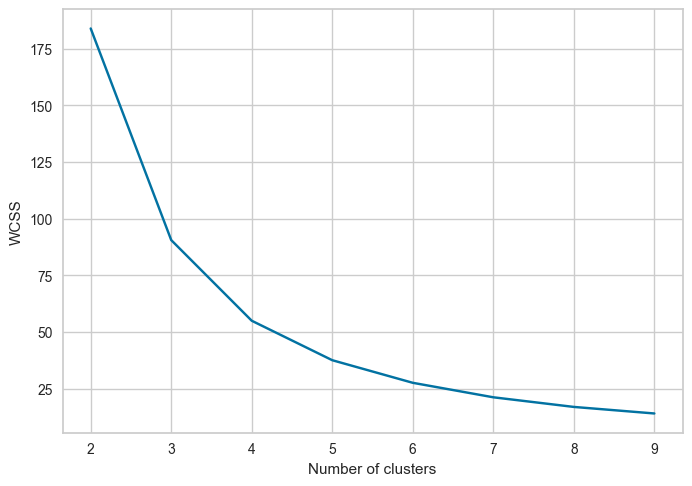

In [25]:
# List untuk menyimpan within-cluster sums of square untuk setiap jumlah cluster
wcss = []

for i in k:    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
    wcss.append(kmeans.inertia_)
plt.plot(k, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method menunjukkan jumlah cluster yang paling optimal berjumlah 3

## Silhouette Visualizer
Selain menggunakan Metrik Silhoutte Coefficient dan Elbow Method, kami menggunakan Silhouette Visualizer untuk memastikan didapat K yang optimal

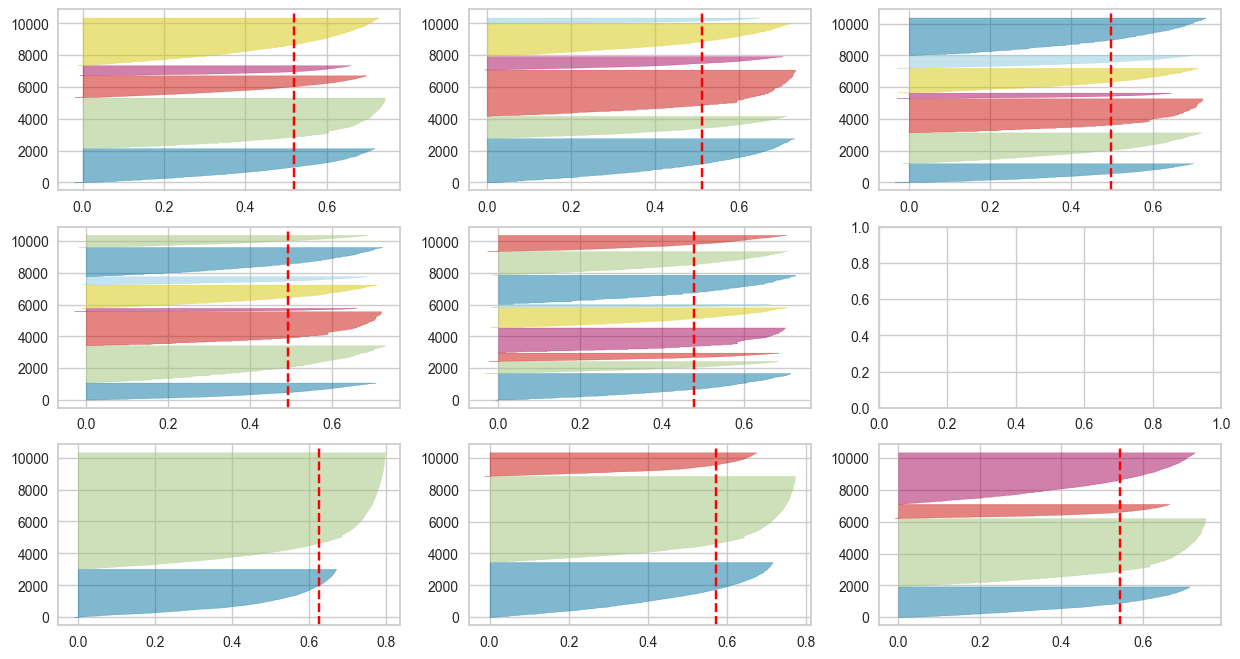

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in k:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(attribute_choose) 

Dari hasil visualisasi Silhouette Visualizer, saat k=2 dan k=3 terlihat bahwa ukuran cluster berbeda (cluster dapat dibedakan) dan terpisah dengan baik

## Silhouette Method

In [27]:
sil = []

for i in k:
  kmeans = KMeans(n_clusters=i, random_state=42).fit(attribute_choose)
  labels = kmeans.labels_
  score = silhouette_score(attribute_choose, labels, metric='euclidean')
  sil.append(score)
best_k = sil.index(max(sil)) + 2
print("Setelah diterapkan Silhouette Method, nilai K yang paling optimal yaitu K=", best_k)

Setelah diterapkan Silhouette Method, nilai K yang paling optimal yaitu K= 2


Dari keempat cara (Metrik Silhoutte Coefficient, Elbow Method, Silhouette Visualizer, dan Silhouette Method), kami memilih K=2

## Menerapkan K-Means Clustering dengan K=2

In [28]:
# Clustering menggunakan data sebelum di normalisasi (tanpa attribute 'Name' dan 'Team')
combined_data_df2 = combined_data_df.copy()
combined_data_df2 = combined_data_df2.drop("Player", axis=1)
combined_data_df2 = combined_data_df2.drop("Name", axis=1)
combined_data_df2 = combined_data_df2.drop("Tm", axis=1)

In [29]:
count_kmeans = KMeans(n_clusters=2, random_state=42)
count_kmeans.fit(attribute_choose)
predict_kmeans = count_kmeans.predict(attribute_choose)

combined_data_df2 = combined_data_df2.drop(columns=new_attribute)
combined_data_df3 = combined_data_df.copy()
combined_data_df3 = combined_data_df3.drop("Player", axis=1)
combined_data_df3 = combined_data_df3.drop("Name", axis=1)
combined_data_df3 = combined_data_df3.drop("Tm", axis=1)
combined_data_df3 = combined_data_df3.drop(columns=combined_data_df2.columns)

# tampilkan attribute_choose dan cluster
combined_data_df3['cluster'] = predict_kmeans
combined_data_df3

,FG,PTS,cluster
0,4.5,11.4,0
1,4.8,12.2,0
2,3.4,8.9,1
3,7.2,20.3,0
4,1.0,2.8,1
...,...,...,...
10310,0.0,0.0,1
10311,4.0,11.5,0
10312,3.6,8.9,1
10313,3.4,8.5,1


In [42]:
df_copy['cluster'] = combined_data_df3['cluster'].values
df_copy

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,Avg GameScore,Salaries,Rank,cluster
0,1,61,56,25.9,4.5,10.6,424.00,0.0,0.4,0.13,...,1.6,1.0,0.5,1.7,2.4,11.4,7.39,3700000.0,195,0
1,1,46,46,26.2,4.8,11.2,433.00,0.0,0.5,95.00,...,1.6,1.2,0.3,1.9,2.5,12.2,7.83,3700000.0,195,0
2,1,15,10,24.9,3.4,8.7,389.00,0.1,0.1,0.50,...,1.7,0.4,0.8,1.3,2.1,8.9,5.59,3700000.0,195,1
3,2,82,82,39.3,7.2,15.6,465.00,0.4,1.2,302.00,...,3.3,1.1,1.1,3.0,3.0,20.3,15.83,3700000.0,157,0
4,3,29,2,11.3,1.0,3.4,286.00,0.3,1.2,257.00,...,2.0,0.8,0.1,1.0,1.3,2.8,2.06,3700000.0,283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,528,2,0,5.5,0.0,1.0,0.00,0.0,0.5,0.00,...,0.5,0.0,0.0,0.0,2.0,0.0,0.15,1933941.0,339,1
10311,528,4,1,20.5,4.0,7.0,571.00,0.0,0.0,0.00,...,0.8,0.3,0.8,1.0,4.0,11.5,8.92,1933941.0,339,0
10312,530,59,37,17.6,3.6,6.4,559.00,0.0,0.0,0.00,...,1.1,0.2,0.9,1.2,2.3,8.9,7.77,1544951.0,389,1
10313,530,33,12,15.6,3.4,5.8,0.58,0.0,0.0,0.00,...,0.8,0.1,0.8,1.0,2.2,8.5,7.13,1544951.0,389,1


## Visualisasi Cluster
Menggunakan data yang sudah di normalisasi agar lebih mudah melihat scalenya

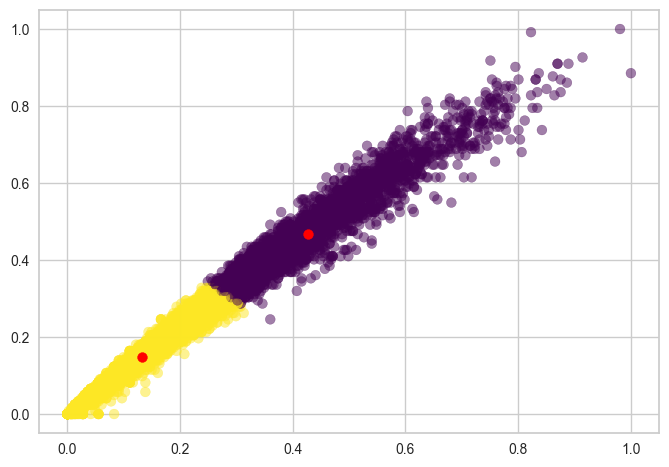

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(normalized_df.loc[:,new_attribute])
centroids = kmeans.cluster_centers_

plt.scatter(attribute1, attribute2, c= kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Interpretasi Cluster

In [31]:
keep_cluster, keep_cluster2 = [], []

# menyimpan pengelompokkan cluster 0 dan 1
for i in range(len(predict_kmeans)) :
    if predict_kmeans[i] == 0 :
        keep_cluster.append(i)
    else:
        keep_cluster2.append(i)
        
# untuk cluster 0 dan 1
cluster_zero, cluster_one = combined_data_df.iloc[keep_cluster], combined_data_df.iloc[keep_cluster2]

## Interpretasi Cluster

Interpretasi cluster berdasarkan 2P

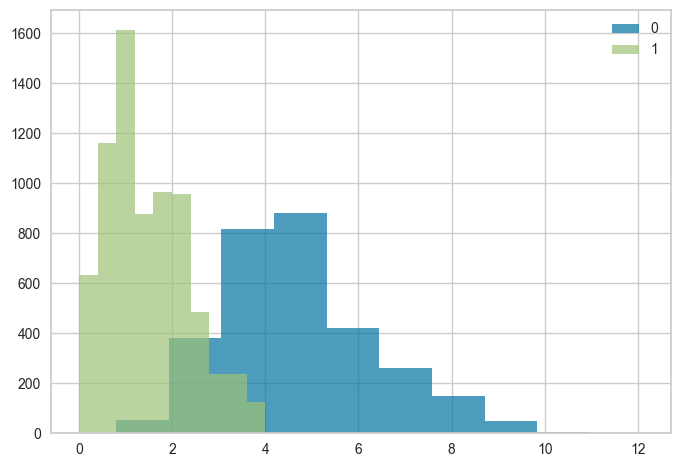

In [49]:
df_copy[df_copy['cluster'] == 0]['2P'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['2P'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

Interpretasi cluster berdasarkan 3P

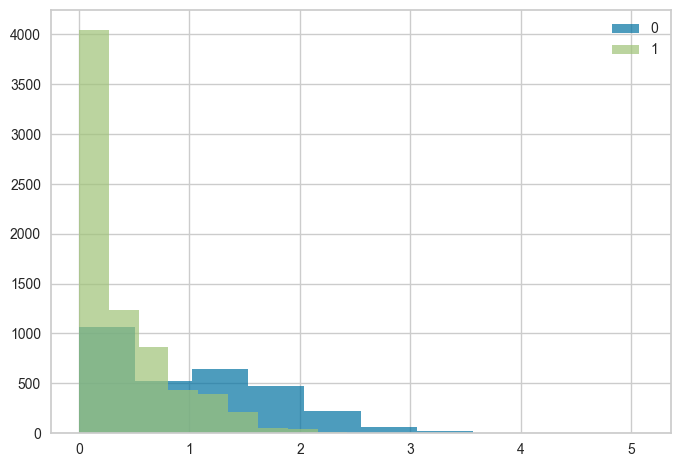

In [50]:
df_copy[df_copy['cluster'] == 0]['3P'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['3P'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

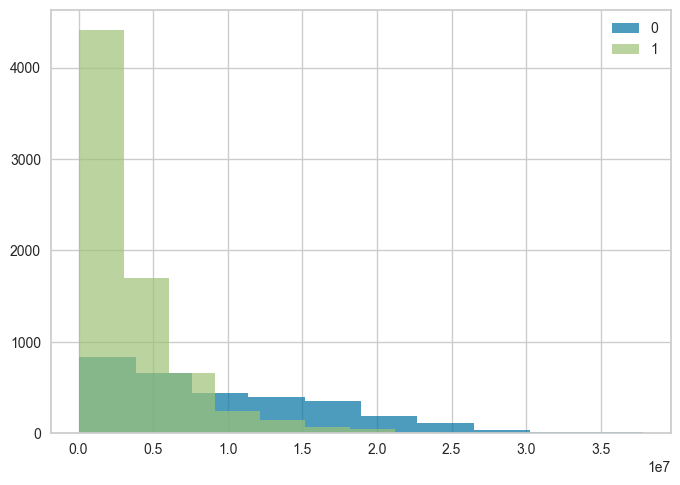

In [48]:
df_copy[df_copy['cluster'] == 0]['Salaries'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['Salaries'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

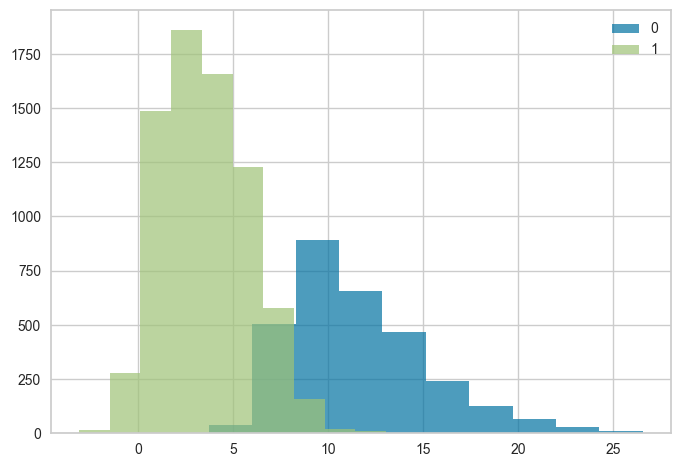

In [47]:
df_copy[df_copy['cluster'] == 0]['Avg GameScore'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['Avg GameScore'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()

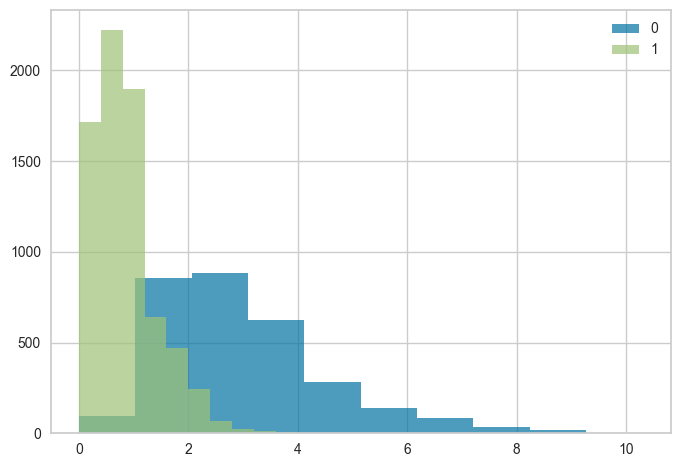

In [52]:
df_copy[df_copy['cluster'] == 0]['FT'].hist(bins=10, alpha=0.7)
df_copy[df_copy['cluster'] == 1]['FT'].hist(bins=10, alpha=0.7)

plt.legend(['0', '1'])
plt.show()